In [1]:
!pip install pip --upgrade
import pandas as pd
import konlpy
from konlpy.tag import Komoran
from pprint import pprint
from collections import defaultdict
from collections import Counter
komoran=Komoran()
print(konlpy.__version__)

Requirement already up-to-date: pip in c:\users\user\anaconda3\lib\site-packages (20.2.3)
0.5.2


In [2]:
##사용자 사전 추가하기
komoran_userdic=Komoran(userdic='./userdicCanSur.txt')
# 형태소분석 결과 보기 komoran.pos(sent)
Data=pd.read_csv("현대차 2020-9-21  11시 1분 22초 merging.csv", encoding='euc-kr',header=0)
corpus=Data['title']
SW = [".co",".kr","기자","뉴스",". co", ". com", ".com",
      "채널","구독","네이버","대상", "무단", "전재", "재배포","금지","https"]

In [3]:
import nltk #nltk라이브러리를 활용하면 토큰데이터를 살펴볼 수 있다고 함 
total_tokens=[token for msg in corpus for token in str(msg).split()]
print(len(total_tokens)) #전체 토큰의 갯수 

14164


In [4]:
text=nltk.Text(total_tokens, name='NMSC') 
#nltk.Text는 토큰데이터를 묶을수 있게 해주나봄
#NMSC는 텍스트객체에 붇이 이름이라고 니옴, <Text:NMSC>라고 나옴  
print(len(set(text.tokens))) #중복을제거한 토큰의 갯수 
print(text.vocab().most_common(10)) #가장 많이 나온 상위 10개의 토큰 
#print(text.vocab().most_common()[:-20:-1]) #하위10개의 토큰 구하기 

2106
[('현대차,', 874), ('현대차', 603), ('첫', 188), ('수출', 169), ('수소연료전지', 158), ('사업', 111), ('사전계약', 111), ('서비스', 104), ('디지털키', 102), ('전시장', 101)]


In [5]:
import re
def message_cleaning(docs):
    docs = [str(doc) for doc in docs] # series의 object를 str로 변경.
    #사진이나 이모티콘제거 
    pattern1 = re.compile("Photo|Emoticon")
    docs = [pattern1.sub("", doc) for doc in docs]
    
    # 자음이나 모음만 존재하는 표현 제거, 예: ㅠㅠ, ㅋㅋㅋ
    pattern2 = re.compile("[ㄱ-ㅎ]*[ㅏ-ㅢ]*") 
    docs = [pattern2.sub("", doc) for doc in docs]
    
    # http://로 시작하는 하이퍼링크 제거 
    pattern3 = re.compile(r"\b(https?:\/\/)?([\w.]+){1,2}(\.[\w]{2,4}){1,2}(.*)")
    docs = [pattern3.sub("", doc) for doc in docs]
    
    # 특수문제 제거 
    pattern4 = re.compile("[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]")
    docs = [pattern4.sub("", doc) for doc in docs]

    return docs

def text_tokenizing(doc):
    # morph만 
    # return [word for word in mecab.morphs(doc) if word not in SW and len(word) > 1]
    
    # wordcloud를 위해 명사만 추출하는 경우.
    return [word for word in komoran_userdic.nouns(doc) if word not in SW and len(word) > 1]

In [6]:
cleaned_corpus = message_cleaning(corpus)
print(len(cleaned_corpus))
#print(cleaned_corpus[:2])

#cleaned_corpus는 현재 list형임
cleaned_text = pd.Series(cleaned_corpus) #대괄호안에 ''와 ,로 구분되어 있던 각 글을 pd.series로 바꾼?
cleaned_data = cleaned_text[cleaned_text != ""] #빈칸이 없는 값을 cleaned_data로 저장? 
#cleaned_data.info() #이건 에러나는데 cleaned_data가 시리즈형이라 그런듯
#cleaned_data.head()


import pickle #피클모듈을 활용해 객체자체를 바이너리로 저장하게 
with open("./cleaned_data.pk", "wb") as f: #cleaned_data파일을 피클로 저장?
    pickle.dump(cleaned_data, f) #피클.덤프(객체, 파일)로 저장하는거임 

#!pip install tqdm
from tqdm import tqdm_notebook # progress bar
#from konlpy.tag import Mecab #Mecab, Okt 등 형태소 분석기 불러오기,앞에서 코모란불러옴 
import numpy as np
import string # 특수문자
import warnings # 경고 알림 제거
from gensim import corpora
from gensim import models
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings("ignore", category=DeprecationWarning) # 경고 알림이 뜨면 모두 무시합니다.

def read_documents(input_file_name):
    """문서들을 주어진 이름의 파일로부터 읽어들여 돌려준다."""
    corpus = []
    with open(input_file_name, 'rb') as f:
        temp_corpus = pickle.load(f)
    for page in temp_corpus:
        corpus += page
    return corpus

def text_cleaning(docs): # 한글만 남기는 함수 
    for doc in docs:
        doc = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", doc)
    return docs

def text_tokenizing(corpus, tokenizer):
    token_corpus = []
    if tokenizer == "noun":
        for n in tqdm_notebook(range(len(corpus)), desc="Preprocessing"):
            token_text = komoran_userdic.nouns(corpus[n])
            token_text = [word for word in token_text if word not in SW and len(word) > 1]
            token_corpus.append(token_text)
            
    elif tokenized == "morph":
        for n in tqdm_notebook(range(len(corpus)), desc="Preprocessing"):
            token_text = komoran_userdic.nouns(corpus[n])
            token_text = [word for word in token_text if word not in SW and len(word) > 1]
            token_corpus.append(token_text)

    elif tokenizer == "word":
        for n in tqdm_notebook(range(len(corpus)), desc="Preprocessing"):
            token_text = corpus[n].split()
            token_text = [word for word in token_text if word not in SW and len(word) > 1]
            token_corpus.append(token_text)
        
    return token_corpus


documents = corpus
#SW = define_stopwords("./stopwords-ko.txt")
cleaned_text = text_cleaning(documents)
tokenized_text = text_tokenizing(cleaned_text, tokenizer="noun") #tokenizer= "noun" or "word"

#print(tokenized_text[11])


def flatten(l):
    flatList=[]
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList
cleaned_nouns=flatten(tokenized_text) #모두 토크나이징된 단어를 flatten하게 
#즉, flatten전에는 각 문장이 []로 또 []안에 있었는데, 플래튼하면 하나의 []로 되었음 
cleaned_nouns=[x for x in cleaned_nouns if len(x)>1] #한글자단어 초과
cleaned_nouns=[x for x in cleaned_nouns if not x in SW] #stop_words에 없는 단어
cleaned_nouns=[x for x in cleaned_nouns if not x.isdigit()] #숫자가 아닌단어 
# 상위 60개 단어 frequency 뽑기 
pd.Series(cleaned_nouns).value_counts().head(60) #상위60개 보여주기 

2000


현대차     1988
수소       426
수출       221
연료전지     205
사업       184
전시장      153
디지털      146
현대건설     145
공항       133
사전       131
인천       129
계약       127
서비스      122
자동차      121
시스템      121
송파대로     117
항공       113
울산       111
도심       109
모빌리티     108
디자인      102
교통        99
신형        96
플랫폼       95
공장        95
돌파        90
확진        89
첫날        89
부문        87
로봇        84
친환경       83
금상        82
공개        82
러브        76
웨어        76
수상        75
유럽        72
기반        72
벡스        68
체험        68
협력        68
대리        68
한국        67
개시        67
추진        66
개소        66
출시        64
코로나       58
기차        58
삼성        58
운전        56
미래        55
세계        54
확장        54
정의선       53
야간        53
스마트       51
운영        51
세대        50
만원        50
dtype: int64

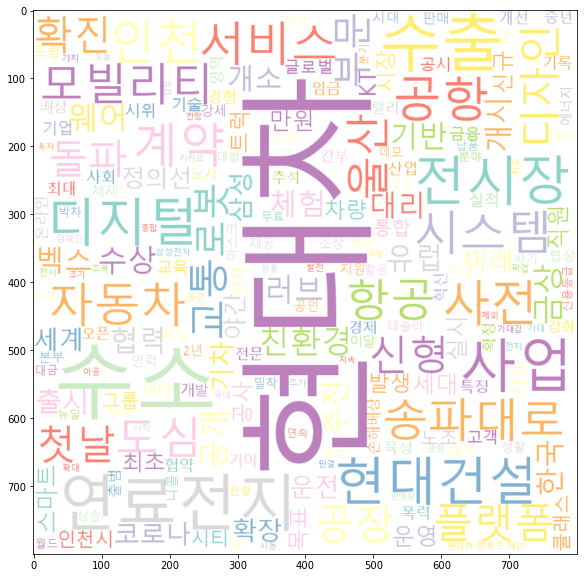

[('출시', 0.42246270179748535), ('확장', 0.3309500515460968), ('운영', 0.3259527087211609), ('디자인', 0.3220440149307251), ('코로나', 0.32194778323173523), ('수상', 0.3049134314060211), ('개시', 0.293319433927536), ('추진', 0.2698214650154114), ('세대', 0.2611139118671417), ('미래', 0.2508644759654999), ('한국', 0.24385328590869904), ('공장', 0.24347060918807983), ('서비스', 0.2394116222858429), ('울산', 0.2379963994026184), ('전시장', 0.22898685932159424), ('사업', 0.22762659192085266), ('신형', 0.22371158003807068), ('계약', 0.22308354079723358), ('운전', 0.22230680286884308), ('공개', 0.22178184986114502)]


In [7]:
from wordcloud import WordCloud
def __array__(self):
    """Convert to numpy array.
    Returns 
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return self.to_array()
def to_array(self):
    return np.array(self.to_image())
font_path = 'C:/Windows/Fonts/malgun.ttf'
wordcloud=WordCloud(font_path=font_path, width=800, height=800, 
                    background_color="white", colormap="Set3")
wordcloud=wordcloud.generate_from_frequencies(Counter(cleaned_nouns))
array=wordcloud.to_array()
fig=plt.figure(figsize=(10,10))
plt.imshow(array, interpolation="bilinear")
plt.show()


dictionary = corpora.Dictionary(tokenized_text)
# 문서-단어 행렬(document-term matrix) 생성
corpus = [dictionary.doc2bow(text) for text in tokenized_text]


import time
import numpy as np
import json
import warnings
import pyLDAvis.gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
coherences=[]
perplexities=[]
passes=[]
warnings.filterwarnings('ignore')

from gensim.models.word2vec import Word2Vec
embedding_model = Word2Vec(tokenized_text, size=100, window = 5, 
                           min_count=50, workers=4, iter=100, sg=1)
#포스태깅된 컨텐츠를 100차원의 벡터로 바꾸고, 주변 단어(window)는 앞뒤로 5개까지 보되, 
#코퍼스 내 출현 빈도가 50번 미만인 단어는 분석에서 제외해라. CPU는 쿼드코어를 쓰고 100번 반복 학습해라. 
#분석방법론은 CBOW와 Skip-Gram 중 후자를 선택해라


print(embedding_model.most_similar(positive=["현대차"], topn=20))

In [8]:
#########잡아라 텍스트 마이닝 with파이선 책 129p
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer("[\w]+")

#아래 stop_words를 수정해가면서 진행 
count={}
for line in Data['title']:
    #words=line.lower()
    tokens=komoran_userdic.nouns(line) #komoran_userdic.nouns대신에 tokenizer.tokenize였음 
    stopped_tokens=[i for i in list(set(tokens)) if not i in SW+["br"]]
    stopped_tokens2=[i for i in stopped_tokens if len(i)>1]
    for i, a in enumerate(stopped_tokens2):
        for b in stopped_tokens2[i+1:]:
            if a>b:
                count[b, a]=count.get((b, a),0)+1
            else :
                count[a, b]=count.get((a, b),0)+1
df=pd.DataFrame.from_dict(count, orient='index')
list1=[]
for i in range(len(df)):
    list1.append([df.index[i][0],df.index[i][1],df[0][i]])


df2=pd.DataFrame(list1,columns=["term1","term2","freq"])
df3=df2.sort_values(by=["freq"],ascending=False)
df3_pos=df3.reset_index(drop=True)
df3_pos.head()
    

,term1,term2,freq
0,수소,현대차,339
1,수출,현대차,219
2,수소,수출,219
3,연료전지,현대차,205
4,수소,연료전지,205


In [9]:
import networkx as nx
import operator

import numpy as np
G_pos=nx.Graph()

for i in range((len(np.where(df3_pos['freq']>10)[0]))):
    G_pos.add_edge(df3_pos['term1'][i], df3_pos['term2'][i], weight=int(df3_pos['freq'][i]))

dgr = nx.degree_centrality(G_pos)       # 한 꼭지점에 연결된 간선의 수 
btw = nx.betweenness_centrality(G_pos)  # 그 꼭지점을 제외한 다른 두 꼭지점을 잇는 최단거리에 해당 꼭지점이 얼마나 많이 등장하는지 빈도로 정의
cls = nx.closeness_centrality(G_pos)    # 특정 꼭지점이 그를 제외한 다른 꼭지점과 얼마나 가까이 있는지를 나타내는 지표 (=해당 꼭지점의 도달가능 거리 총합의 역수)
egv = nx.eigenvector_centrality(G_pos)

sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)
sorted_egv = sorted(egv.items(), key=operator.itemgetter(1), reverse=True)

print("** degree **")
for x in range(20):
    print(sorted_dgr[x])

print("** betweenness **")
for x in range(20):
    print(sorted_btw[x])

print("** closeness **")
for x in range(20):
    print(sorted_cls[x])

print("** eigenvector **")
for x in range(20):
    print(sorted_egv[x])

** degree **
('현대차', 0.9808612440191388)
('수소', 0.13875598086124402)
('사업', 0.1291866028708134)
('현대건설', 0.07177033492822966)
('모빌리티', 0.07177033492822966)
('연료전지', 0.06698564593301436)
('공항', 0.06698564593301436)
('수출', 0.06220095693779904)
('디지털', 0.06220095693779904)
('인천', 0.06220095693779904)
('전시장', 0.06220095693779904)
('송파대로', 0.06220095693779904)
('계약', 0.057416267942583726)
('서비스', 0.057416267942583726)
('항공', 0.057416267942583726)
('도심', 0.057416267942583726)
('울산', 0.057416267942583726)
('한국', 0.057416267942583726)
('사전', 0.05263157894736842)
('교통', 0.05263157894736842)
** betweenness **
('현대차', 0.9556051222169643)
('온라인', 0.0305483989694516)
('수소', 0.007042957042957041)
('개최', 0.007039013617960986)
('사업', 0.004939121550963656)
('드림', 0.004800024536866642)
('데모', 0.0023616734143049934)
('데이', 0.0023616734143049934)
('모빌리티', 0.0016178996442154335)
('디지털', 0.0008733590970433076)
('울산', 0.0006900993743099006)
('서비스', 0.0006203226597963439)
('전시장', 0.0006034535639798797)
('송파대로

AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

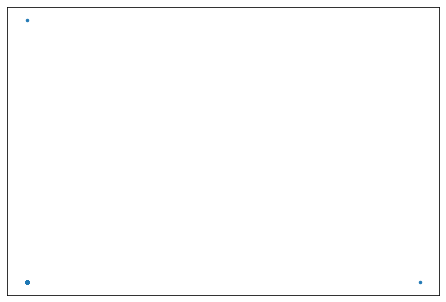

In [10]:
!pip install matplotlib
G = nx.Graph()

for i in range(len(sorted_cls)):
    G.add_node(sorted_cls[i][0], nodesize=sorted_dgr[i][1])

for i in range((len(np.where(df3_pos['freq']>100)[0]))): #원래 15였는데 50으로 
    G.add_weighted_edges_from([(df3_pos['term1'][i], df3_pos['term2'][i],int(df3_pos['freq'][i]))])

sizes = [G.node[node]['nodesize']*500 for node in G]

%matplotlib inline
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
matplotlib.font_manager._rebuild()

font_name = font_manager.FontProperties(fname=font_path).get_name()
options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
    'font_family': font_name,
}

#nx.draw(G, node_size=6, pos=nx.spring_layout(G, k=2.5, iterations=50), **options) ##node_size나 레이아웃, k 수정함

nx.draw(G, node_size=6, pos=nx.spectral_layout(G), **options) ##node_size나 레이아웃, k 수정함

ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()

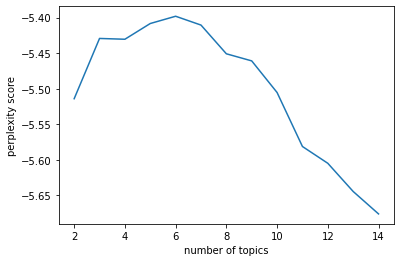

In [11]:
import matplotlib.pyplot as plt
perplexity_values=[]
for i in range(2,15):
    model = models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary, alpha="auto", eta="auto", random_state=99)
    perplexity_values.append(model.log_perplexity(corpus))

x=range(2,15)
plt.plot(x, perplexity_values)
plt.xlabel("number of topics")
plt.ylabel("perplexity score")
plt.show()

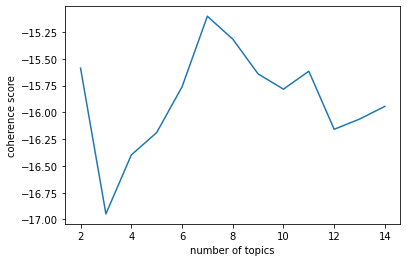

In [12]:
import gensim
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values=[]
for i in range(2,15):
    ldamodel = LdaModel(corpus, id2word=dictionary, num_topics=i, iterations=400)
    #ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    #ldamodel = models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary, random_state=99)
    #coherence_model_lda=CoherenceModel(model=ldamodel, texts=corpus, dictionary=dictionary, topn=10)
    coherence_model_lda=CoherenceModel(model=ldamodel, corpus=corpus, coherence='u_mass')
    coherence_lda=coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)
    
x=range(2,15)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

In [13]:
# 위의 결과를 바탕으로 토픽 개수, 키워드 개수를 정해주는 변수를 추가.
NUM_TOPICS = 2
NUM_TOPIC_WORDS = 30

def build_doc_term_mat(documents):
    # 문서-단어 행렬 만들어주는 함수.
    print("Building document-term matrix.")
    dictionary = corpora.Dictionary(documents)
    corpus = [dictionary.doc2bow(document) for document in documents]
    return corpus, dictionary

def print_topic_words(model):
    # 토픽 모델링 결과를 출력해 주는 함수.
    print("\nPrinting topic words.\n")
    for topic_id in range(model.num_topics):
        topic_word_probs = model.show_topic(topic_id, NUM_TOPIC_WORDS)
        print("Topic ID: {}".format(topic_id))
        for topic_word, prob in topic_word_probs:
            print("\t{}\t{}".format(topic_word, prob))
        print("\n")

# document-term matrix를 만들고,
corpus, dictionary = build_doc_term_mat(tokenized_text)
# LDA를 실행.
model = models.ldamodel.LdaModel(corpus, num_topics=NUM_TOPICS, 
                                 id2word=dictionary, alpha="auto", eta="auto", random_state=99)
# 결과를 출력.
print_topic_words(model)
print(model.log_perplexity(corpus))

Building document-term matrix.

Printing topic words.

Topic ID: 0
	현대차	0.15443603694438934
	수소	0.036329612135887146
	수출	0.018672505393624306
	연료전지	0.017471397295594215
	전시장	0.013329291716217995
	시스템	0.010568076744675636
	자동차	0.01011218037456274
	송파대로	0.009443605318665504
	디지털	0.009237849153578281
	울산	0.009043929167091846
	현대건설	0.008946527726948261
	공항	0.008606960065662861
	사업	0.008555715903639793
	사전	0.007553803734481335
	부문	0.007510873023420572
	플랫폼	0.007485785521566868
	친환경	0.007337913848459721
	계약	0.006992258131504059
	공장	0.006986694410443306
	모빌리티	0.006812381558120251
	신형	0.006806301884353161
	확진	0.006565524265170097
	도심	0.0064275446347892284
	교통	0.006253812927752733
	유럽	0.006184575147926807
	인천	0.006126890890300274
	항공	0.005980213638395071
	서비스	0.005913401022553444
	체험	0.005884543526917696
	개시	0.00577326025813818


Topic ID: 1
	현대차	0.09472648054361343
	사업	0.024400027468800545
	로봇	0.017119869589805603
	인천	0.016838669776916504
	디자인	0.016712993383407593
	금상	0.0156378373503685
	서비스	0

In [14]:
# pyLDAvis 불러오기
import pyLDAvis
import pyLDAvis.gensim

# pyLDAvis를 jupyter notebook에서 실행할 수 있게 활성화.
pyLDAvis.enable_notebook()

# pyLDAvis 실행.
data = pyLDAvis.gensim.prepare(model, corpus, dictionary)
data


PreparedData(topic_coordinates=             x    y  topics  cluster       Freq
topic                                          
0      0.04398  0.0       1        1  64.924282
1     -0.04398  0.0       2        1  35.075718, topic_info=    Term        Freq       Total Category  logprob  loglift
149   로봇   96.000000   96.000000  Default  30.0000  30.0000
46    사업  191.000000  191.000000  Default  29.0000  29.0000
147   금상   92.000000   92.000000  Default  28.0000  28.0000
148   러브   86.000000   86.000000  Default  27.0000  27.0000
152  디자인  111.000000  111.000000  Default  26.0000  26.0000
..   ...         ...         ...      ...      ...      ...
355   운전   29.929515   57.096995   Topic2  -5.0671   0.4018
187   대리   31.380642   67.610774   Topic2  -5.0198   0.2801
31    수소   56.110913  375.546131   Topic2  -4.4386  -0.8534
184   신형   31.190863   91.036603   Topic2  -5.0258  -0.0235
125   수출   31.933239  196.114893   Topic2  -5.0023  -0.7674

[165 rows x 6 columns], token_table=      Topic      Freq Term
term                      
56        1  0.867094   19
56        2  0.123871   19
527       1  0.813366   9월
527       2  0.162673   9월
618       1  0.298874   AI
...     ...       ...  ...
358       2  0.203634   확장
165       1  0.694845   확진
165       2  0.311482   확진
503       1  0.255454   활용
503       2  0.715272   활용

[238 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])